In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("suicide_rates.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
df=df.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})
df.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
df = df.drop(['HDIForYear','CountryYear'],axis=1)
df.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [8]:
min_year=min(df.Year)
max_year=max(df.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

Min Year : 1985
Max Year : 2016


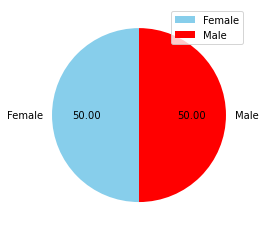

In [38]:
plt.pie(x=df.Gender.value_counts(),
        labels=['Female','Male'],
        startangle = 90,
        colors=['skyblue','red'],
        autopct='%.2f'
       );
plt.legend();

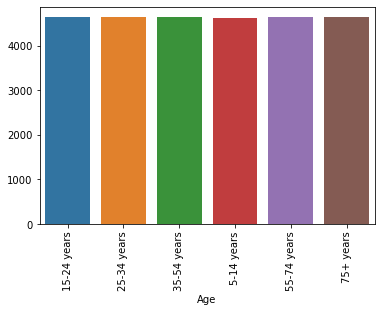

In [34]:
sns.barplot(x=df.groupby('Age')['Gender'].count().index,
            y=df.groupby('Age')['Gender'].count().values)
plt.xticks(rotation=90)
plt.show()

In [40]:
suicidesNo=[]
for country in df.Country.unique():
    suicidesNo.append(sum(df[df['Country']==country].SuicidesNo)) 

In [43]:
suicidesNo=pd.DataFrame(suicidesNo,columns=['suicidesNo'])
country=pd.DataFrame(df.Country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicidesNo,country],axis=1)

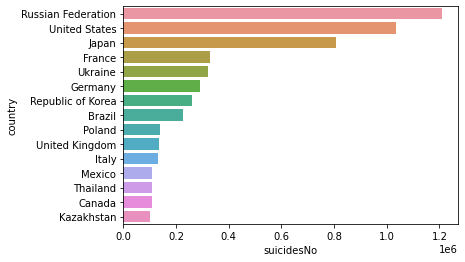

In [45]:
data_suicide_countr=data_suicide_countr.sort_values(by='suicidesNo',ascending=False)
sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicidesNo[:15])
plt.show()

C:\Users\SREEKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


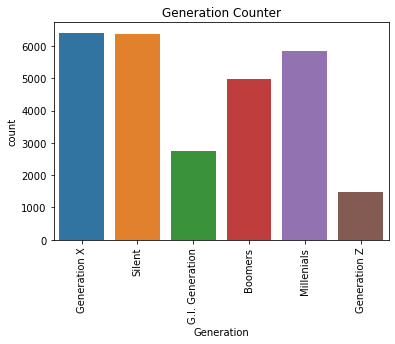

In [48]:
sns.countplot(df.Generation)
plt.title('Generation Counter')
plt.xticks(rotation=90)
plt.show()

C:\Users\SREEKUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


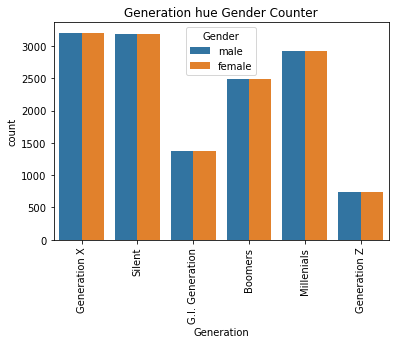

In [52]:
sns.countplot(df.Generation,hue=df.Gender)
plt.title('Generation hue Gender Counter')
plt.xticks(rotation=90)
plt.show()

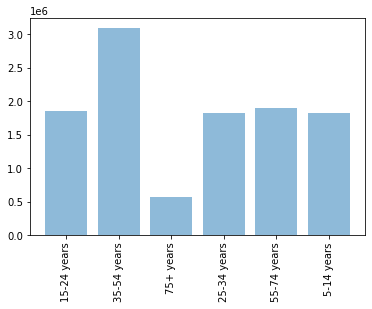

In [55]:
index_population=[]
for age in df['Age'].unique():
    index_population.append(sum(df[df['Age']==age].Population)/len(df[df['Age']==age].Population))
    
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

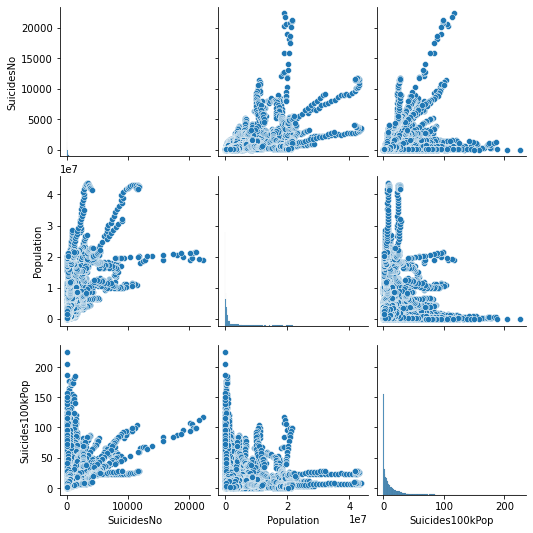

In [64]:
sns.pairplot(df[['SuicidesNo','Population','Suicides100kPop']])